In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def get_present_value(future_value,rate,time):
    return (future_value/(1+rate)**time)

In [3]:
pv = get_present_value(50000,0.05,1)
display(pv)

47619.04761904762

In [4]:
### Distribution of cash flow of 1 million dollars over 20 year period with a fixed rate of interest 0.05

In [5]:
cashflows  = np.ones(20) *50000
cashflows.shape

(20,)

In [6]:
for i in range(cashflows.shape[0]):
    cashflows[i] = get_present_value(50000,0.05,i)

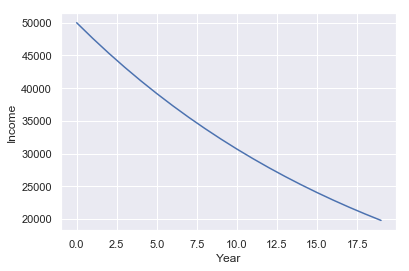

In [7]:
cashflow_df = pd.DataFrame(list(zip(range(cashflows.shape[0]),cashflows)),columns =['Year','Income'])
ax = sns.lineplot(x="Year", y="Income", data=cashflow_df)

#####  Calculate the future value 
* Inputs Present Value,rate of interest,time
* Deterministic modelling *assumming rate is constant*

In [8]:
def get_future_value(present_value,rate,time):
    return (present_value * (1+rate)**time)

In [9]:
pv = get_future_value(47620,0.05,1)
display(pv)

50001.0

In [10]:
fv_cashflows  = np.ones(20) *50000
for i in range(cashflows.shape[0]):
    fv_cashflows[i] = get_future_value(50000,0.05,i)

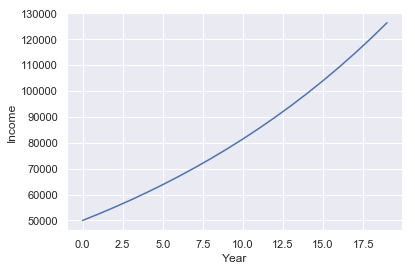

In [11]:
fv_cashflow_df = pd.DataFrame(list(zip(range(fv_cashflows.shape[0]),fv_cashflows)),columns =['Year','Income'])
ax = sns.lineplot(x="Year", y="Income", data=fv_cashflow_df)

In [12]:
#### fluctuating rate
#### mean , standard deviation
np.random.normal(0.095,0.185)

-0.08094637440651564

In [13]:
ending_balance  = np.ones(20) *50000

In [14]:
for t in range(ending_balance.shape[0]):
    r = np.random.normal(0.095,0.185)
    if t > 0:
        ending_balance[t] = ending_balance[t-1] *(1+r)
    else:
        ending_balance[t] =ending_balance[t]
ending_balance
        
        

array([ 50000.        ,  33100.71858468,  30508.10761658,  35791.19820107,
        40746.55982239,  53564.34727097,  58641.86849281,  63937.85630818,
        74286.63513383,  70606.23033991,  75647.51649468, 106617.91623137,
        89054.39929676, 101082.08287376, 121646.52611148,  87749.06113225,
        99466.95889899, 149435.86093731, 153768.98838048, 123698.3195    ])

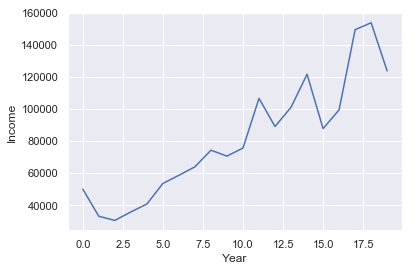

In [15]:
ending_balance_df = pd.DataFrame(list(zip(range(ending_balance.shape[0]),ending_balance)),columns =['Year','Income'])
ax = sns.lineplot(x="Year", y="Income", data=ending_balance_df)

In [16]:
r =0.05
t =1
pv =50000
np.fv(r,t,0,-pv)

52500.0

#### Net Present Value
Net Present Value (NPV) = (Cash Flow / (1+rate of return) ^ number of time periods ) - initial investment

The outcomes for NPV can be positive or negative, which correlates to whether a project is ideal (a positive outcome) or should be abandoned (negative NPV). The higher the positive NPV number outcome, the more advantageous the investment or project. With regard to the discounted rate, this factor is based on how the project or company obtains funding. Funding through expensive, high-interest loans should be considered when determining the NPV.



In [17]:
initial_investment =100000
rt = 0.12
years = np.arange(1,6)
cashflows = np.ones(5) *30000
discounted_cashflows = sum(cashflows / (1+rt) ** years)
npv = discounted_cashflows  - initial_investment


In [18]:
npv

8143.286070350136

#### lnternal rate of return
The internal rate of return (IRR) is a metric used in capital budgeting to estimate the profitability of potential investments. 

The internal rate of return is a discount rate that makes the net present value (NPV) of all cash flows from a particular project equal to zero. 
IRR calculations rely on the same formula as NPV does.

In [19]:
irr_cashflows =[-100000,30000,30000,30000,30000,30000]
costofcapital = np.irr(irr_cashflows)

discounted_cashflows = cashflows / (1+costofcapital) ** years

npv = round(initial_investment-sum(discounted_cashflows),4)

display(npv)

0.0

#### Amortization

In [20]:
# numpy.pmt(rate, nper, pv, fv, when = ‘end’)
pv =360000.00
rate = 0.05875
term =30 
pmt  = np.pmt(rate/12,term*12,-pv)
print(pmt)

2129.535947424394


In [22]:
amortize_df = pd.DataFrame({'Balance': np.zeros(term *12+1),
                            'Interest':np.zeros(term *12+1),
                            'Principal':np.zeros(term *12+1),
                            'Cum_Int':np.zeros(term *12+1)})

In [27]:
amortize_df['Balance'][0] =pv
amortize_df['Interest'][0] = amortize_df['Balance'][0] * rate / 12
amortize_df['Principal'][0] = pmt - amortize_df['Interest'][0] 
amortize_df['Cum_Int'] = amortize_df['Interest'].cumsum()

In [29]:
amortize_df.head() 

,Balance,Interest,Principal,Cum_Int
0,360000.0,1762.5,367.035947,1762.5
1,0.0,0.0,0.000000,1762.5
2,0.0,0.0,0.000000,1762.5
3,0.0,0.0,0.000000,1762.5
4,0.0,0.0,0.000000,1762.5


In [30]:
term_in_months = term *12 
for index in range(1,term_in_months):
    amortize_df['Balance'][index] = amortize_df['Balance'][index-1] -amortize_df['Principal'][index-1]
    amortize_df['Interest'][index] =amortize_df['Balance'][index] * rate / 12
    amortize_df['Principal'][index] = pmt - amortize_df['Interest'][index] 
    
amortize_df['Cum_Int'] = amortize_df['Interest'].cumsum()
    
    

In [31]:
amortize_df.head(15)

,Balance,Interest,Principal,Cum_Int
0,360000.000000,1762.500000,367.035947,1762.500000
1,359632.964053,1760.703053,368.832894,3523.203053
2,359264.131158,1758.897309,370.638639,5282.100362
3,358893.492520,1757.082724,372.453224,7039.183086
4,358521.039296,1755.259255,374.276693,8794.442341
5,358146.762604,1753.426859,376.109089,10547.869199
6,357770.653515,1751.585491,377.950456,12299.454690
7,357392.703058,1749.735109,379.800839,14049.189799
8,357012.902220,1747.875667,381.660280,15797.065466
9,356631.241939,1746.007122,383.528825,17543.072588


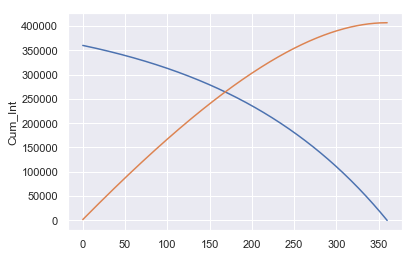

In [43]:
sns.lineplot(x=amortize_df.index, y= amortize_df.Balance )
sns.lineplot(x=amortize_df.index, y= amortize_df.Cum_Int )